# Stats

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Read the Data

In [2]:
df = pd.read_csv("lc_loan.csv")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Distributions

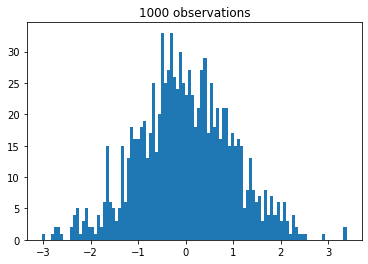

In [3]:
# Exercise change observations
plt.figure()
observations= 1000
plt.hist(np.random.normal(loc=0.0, scale=1.0, size=observations),100)
plt.title(f"{observations} observations")
plt.show()


In [4]:
x = np.random.binomial(10,
                       .5,
                       1000
                       )
#_ = plt.plot(x)
print(x.mean())

5.014


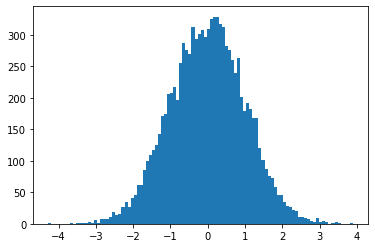

In [5]:
x = np.random.normal(0,
                    1,
                    10000
                       )
_ = plt.hist(x,bins=100)


# Hauptwerte

## Mittelwert

In [6]:
df['loan_amnt'].mean()

14755.26460508982

Text(14755.26460508982, 60000, '  Mean:  14755.26 $')

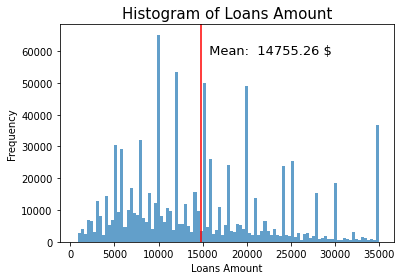

In [7]:
mean = df['loan_amnt'].mean()
df['loan_amnt'].hist(bins=100,grid = False,alpha= 0.7)
plt.title("Histogram of Loans Amount",size=15)
plt.xlabel("Loans Amount")
plt.ylabel("Frequency")
plt.axvline(mean, color="red")
plt.text(mean, 60000, "  Mean:{:10.2f} $".format(mean), verticalalignment='center',size=13)



## Median

In [8]:
df['loan_amnt'].median()

13000.0

Text(13000.0, 60000, '  Mean:13000.0 $')

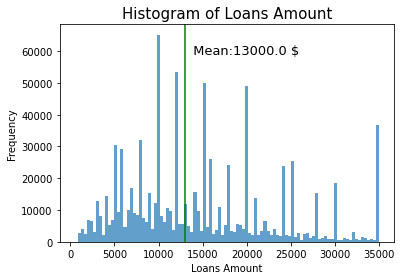

In [9]:
median = df['loan_amnt'].median()

df['loan_amnt'].hist(bins=100,grid = False,alpha= 0.7)
plt.title("Histogram of Loans Amount",size=15)
plt.xlabel("Loans Amount")
plt.ylabel("Frequency")
plt.axvline(median, color="green")
plt.text(median, 60000, "  Mean:{} $".format(median), verticalalignment='center',size=13)


## Modus

In [10]:
df['title'].mode()[0]

'Debt consolidation'

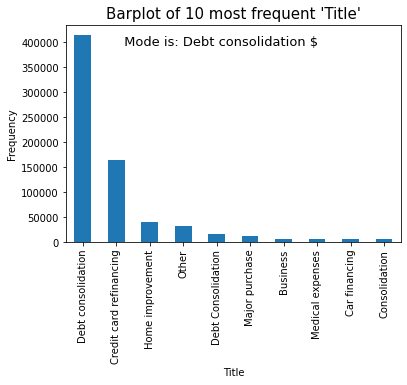

In [11]:
mode = df['title'].mode()[0]
df['title'].value_counts().head(10).plot(kind='bar')
plt.title("Barplot of 10 most frequent 'Title'",size=15)
plt.xlabel("Title")
plt.ylabel("Frequency")
_ = plt.text(1,400000, "  Mode is: {} $".format(mode), verticalalignment='center',size=13)


## Quartile

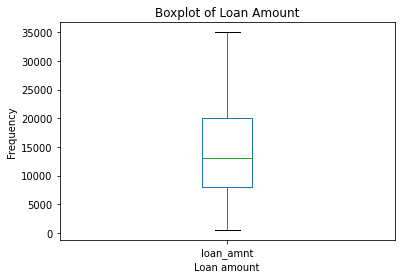

In [12]:
#df['loan_amnt'].boxplot(grid = False)
df.boxplot(column=['loan_amnt'],grid = False)
plt.xlabel('Loan amount')
plt.ylabel("Frequency")
_ = plt.title("Boxplot of Loan Amount")


In [13]:
q1 = df['loan_amnt'].quantile(0.25)
q2 = df['loan_amnt'].quantile(0.5)
q3 = df['loan_amnt'].quantile(0.75)
iqr = q3 - q1
print("1st Quartile:{} - 2nd  Quartile:{} - 3rd  Quartile:{} Interquartile Range:{}".format(q1,q2,q3,iqr))

1st Quartile:8000.0 - 2nd  Quartile:13000.0 - 3rd  Quartile:20000.0 Interquartile Range:12000.0


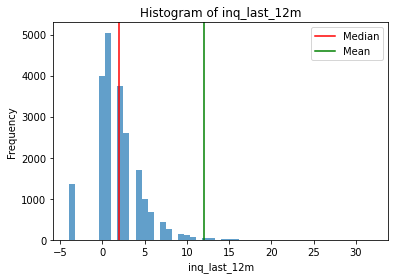

In [14]:
c='inq_last_12m'
b = 50
median = df[c].median()
mean  = df[c].mean()

df[c].hist(bins=b,grid = False,alpha= 0.7)
plt.title("Histogram of "+c)
plt.xlabel(c)
plt.ylabel("Frequency")
plt.axvline(mean, color="red", label = 'Median')
plt.axvline(median+10, color="green", label = 'Mean')

plt.legend()
#df[c].describe()

# Streeungsmasse (Spread measures)

## Varianz

In [15]:
df['loan_amnt'].var() # ... squared USD dollars

71156911.20113908

## Standard deviation

In [16]:
df['loan_amnt'].std() # USD dollars

8435.455601278396

In [17]:
df['loan_amnt'].describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

## Distributions properties

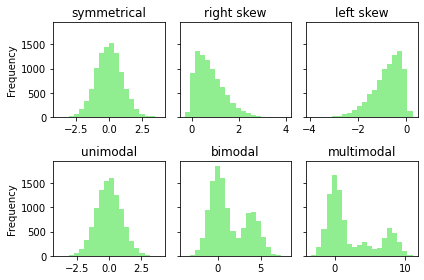

In [19]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True)

ax[0, 0].hist(np.random.normal(0,1,10000),bins=20,color='lightgreen') 
ax[0, 0].set_title('symmetrical')
ax[0, 0].set_ylabel("Frequency")


ax[0, 1].hist(skewnorm.rvs(10,size=8500),bins=20,color='lightgreen')
ax[0, 1].set_title('right skew')

ax[0, 2].hist(skewnorm.rvs(-10,size=8500),bins=20,color='lightgreen')
ax[0, 2].set_title('left skew')

ax[1, 0].hist(np.random.normal(0,1,10000),bins=20,color='lightgreen')
ax[1, 0].set_title('unimodal')
ax[1, 0].set_ylabel("Frequency")

ax[1, 1].hist(np.concatenate((np.random.normal(0,1,8000),np.random.normal(4,1,4000) )),bins=20,color='lightgreen')
ax[1, 1].set_title('bimodal')

ax[1, 2].hist(np.concatenate((np.random.normal(0,1,6000),np.random.normal(4,1,1000),np.random.normal(8,1,2000))),bins=20,color='lightgreen')
ax[1, 2].set_title('multimodal')
plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=484ce270-3a41-4dd6-9050-10e2ff2d7d59' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>